# Task for Data Scientist - Analyze reddit group


Collect and analyze data.

Create the necessary aggregations and data representations. 

Create a visualization of the collected data.

Provide an analysis of the work done and the results of the test task.

* About the data source
https://www.reddit.com/r/SnapLenses/

This is a community lens subreddit. 

Community lenses - lenses developed by designers in an open studio. 

Users can create a lens on their own and send it for review. 

If the lens passes the review, it will be released for general use.
FAQ - https://lensstudio.snapchat.com/support/.

 ***Task description***
 
It is necessary in any convenient way to collect information on publications in this subreddit (subreddit), and to analyze the data.

Questions and tasks that must be completed as part of the test task:
* Collect data.
* Build a graph of the number of publications by day. Is there a tendency to increase / decrease the number of publications?

* Identify the most active users who publish most often.
* Identify the most popular publications by the number of comments and “vote”
* Is there a correlation between the number of likes and comments of publications?
* Is it possible to identify the main features on the basis of which it can be assumed whether the publication will be popular (the number of Vote) or not?
* What insights can be gleaned from existing data? How can they be useful for business?

*** The result of the work performed will be considered:
documentation with comments on the progress of the work;
clear visualization of the collected data;
presentation of the code (if it was) that was used as part of the work;
analysis and conclusions that were made on the basis of the implementation of these tasks.

In [1]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import praw
from tqdm import tqdm
from datetime import datetime

In [188]:
# Set the constants
# pls use your credentials

client_id=
client_secret=
password=
username=

In [191]:
# create connection with credentials 
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     password=password,
                     user_agent='android:com.example.myredditapp:v1.2.3 (by /u/kemitche)',
                     username=username)

print(reddit.user.me()) # check connection

Find_myway_today


In [93]:
# get the last 2000 records 
data_get = reddit.subreddit('SnapLenses').new(limit=2000) 

In [ ]:
# for i in data_:
#     print(dir(i))

# # we can check the data 

In [94]:
# create empty lists for selected fields

topic = {'title':[], 'id':[], 'author':[], 'author_flair_text':[], 'created':[], 'score':[], 
         'num_comments':[], 'is_video':[], 'distinguished':[], 'is_original_content':[], 'over_18':[],\
        'stickied':[], 'upvote_ratio':[], }

In [95]:
for i in tqdm(data_get): # Fill the lists with data from subreddit object 
    
    topic['title'].append(i.title)
    topic['id'].append(i.id)
    topic['author'].append(i.author)
    topic['author_flair_text'].append(i.author_flair_text)
    topic['created'].append(i.created)
    topic['score'].append(i.score)
    topic['num_comments'].append(i.num_comments)
    topic['is_video'].append(i.is_video)
    topic['distinguished'].append(i.distinguished)
    topic['is_original_content'].append(i.is_original_content)
    topic['over_18'].append(i.over_18)
    topic['stickied'].append(i.stickied)
    topic['upvote_ratio'].append(i.upvote_ratio)
    

999it [16:26,  1.18s/it]


In [97]:
topic.keys() # check if all needed keys are obtained 

dict_keys(['title', 'id', 'author', 'author_flair_text', 'created', 'score', 'num_comments', 'is_video', 'distinguished', 'is_original_content', 'over_18', 'stickied', 'upvote_ratio'])

In [98]:
data = pd.DataFrame(topic) # convert into DF

In [99]:
data.info() # check the data columns type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
title                  999 non-null object
id                     999 non-null object
author                 989 non-null object
author_flair_text      159 non-null object
created                999 non-null float64
score                  999 non-null int64
num_comments           999 non-null int64
is_video               999 non-null bool
distinguished          33 non-null object
is_original_content    999 non-null bool
over_18                999 non-null bool
stickied               999 non-null bool
upvote_ratio           999 non-null float64
dtypes: bool(4), float64(2), int64(2), object(5)
memory usage: 74.2+ KB


In [100]:
data.fillna(0, inplace=True) # replace None
data['created'] = data['created'].apply(datetime.fromtimestamp) #convert into readble date type
data['author'] = data['author'].astype(str) # convert autor columns into str type for aggregation

In [101]:
data.head() # see the content

,title,id,author,author_flair_text,created,score,num_comments,is_video,distinguished,is_original_content,over_18,stickied,upvote_ratio
0,✨💦Fresh out of the Chromatic Water 💦✨,e9o5u2,Bonnet_noir,0,2019-12-13 00:21:34,12,1,True,0,False,False,False,1.00
1,Baby yoda,e9ir7d,veggietalepizzaangel,0,2019-12-12 14:32:07,1,1,False,0,False,False,False,0.56
2,[Request] Anyone have this swirl effect lens?,e9cg3p,Gekko_Guy,0,2019-12-12 06:15:02,1,0,False,0,False,False,False,1.00
3,Alien Power!! (Enjoy),e9bc40,emiliusvgs,0,2019-12-12 04:57:21,4,1,True,0,False,False,False,1.00
4,Snapchat lens for Salman Khan (A Bollywood Sta...,e99e0s,timetraveller2090,0,2019-12-12 02:37:32,2,0,False,0,False,False,False,0.75


### Build a graph of the number of publications by day. Is there a tendency to increase / decrease the number of publications?


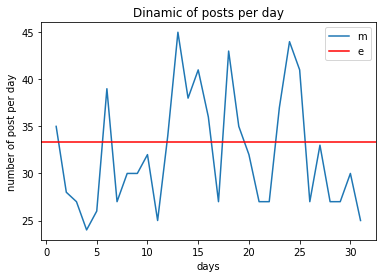

In [102]:
# plot the simple graph

plt.plot(data.groupby(data.created.dt.day)['id'].count())
plt.axhline(data.groupby(data.created.dt.day)['id'].count().sum() / 30, color='red')
plt.title('Dinamic of posts per day')
plt.xlabel('days')
plt.ylabel('number of post per day')
plt.legend('mean')

#### There are several peaks and falls in post publication during month with mean of 34 per day. 

#### We can check it for weekday period?

In [125]:
# iterate over date column to get the week day

for i in range(0, len(data)):
    data['week_day'][i] = data.created[i].weekday()

/home/volodymyr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,title,id,author,author_flair_text,created,score,num_comments,is_video,distinguished,is_original_content,over_18,stickied,upvote_ratio,week_day
0,✨💦Fresh out of the Chromatic Water 💦✨,e9o5u2,Bonnet_noir,0,2019-12-13 00:21:34,12,1,True,0,False,False,False,1.00,4
1,Baby yoda,e9ir7d,veggietalepizzaangel,0,2019-12-12 14:32:07,1,1,False,0,False,False,False,0.56,3
2,[Request] Anyone have this swirl effect lens?,e9cg3p,Gekko_Guy,0,2019-12-12 06:15:02,1,0,False,0,False,False,False,1.00,3
3,Alien Power!! (Enjoy),e9bc40,emiliusvgs,0,2019-12-12 04:57:21,4,1,True,0,False,False,False,1.00,3
4,Snapchat lens for Salman Khan (A Bollywood Sta...,e99e0s,timetraveller2090,0,2019-12-12 02:37:32,2,0,False,0,False,False,False,0.75,3


Text(0, 0.5, 'number of post')

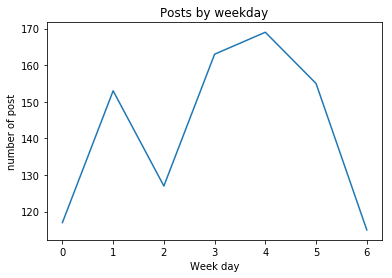

In [173]:
# plot the graph to see week day dynamics  

plt.plot(data.groupby('week_day')['id'].count())
plt.title('Posts by weekday')
plt.xlabel('Week day')
plt.ylabel('number of post')

####  we see that most active day is friday with more than 170 post a day

### Identify the most active users who publish most often.

In [56]:
# Group data by most popular authors

data.groupby(['author'])['id'].count().sort_values(ascending=False)[:10]

author
pinkpirate82      32
AutoModerator     30
modelsbymike3d    23
belzenwa          16
Vodkool           16
Klipko69          15
LinkdudeGamer     15
ApocTheLegend     14
vsnake12          14
mypinkyhurts      13
Name: id, dtype: int64

### let us the distribution of most popular authors

Text(0.5, 0, 'number of authors')

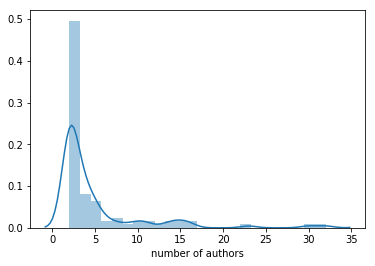

In [135]:
# plot dist of popular authors

sns.distplot(data.groupby(['author'])['id'].count().sort_values(ascending=False)[:100])
plt.xlabel('number of authors')

#### Most of the post were done by limited number of authors (skewed dist to left)

### Identify the most popular publications by the number of comments and “vote”

In [154]:
# Group the score and # comments 

data.groupby(['title'])[['score', 'num_comments']].count().sort_values(by='score', ascending=False)[:5]

,score,num_comments
title,,
What filter is this?,3,3
Green Eyes,3,3
Anyone know what this filter is?,2,2
Fanging Out,2,2
Snap to Unlock!,2,2


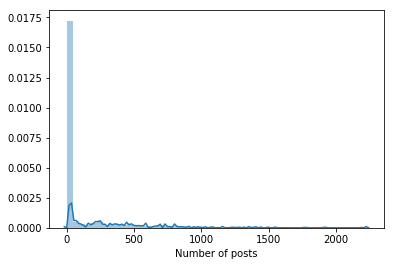

In [161]:
# let see the distribution of score 


sns.distplot(data['score'], norm_hist=True, axlabel='Number of posts')

* Limited number of post gets any votes and score. less than 100 is reated at all

### Is there a correlation between the number of likes and comments of publications?

Text(0.5, 1.0, 'Correlation between comments and score of the post')

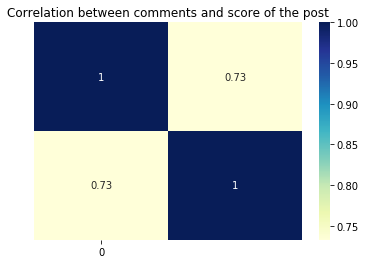

In [76]:
corr_ = np.corrcoef(data['num_comments'], data['score'])
sns.heatmap(corr_, annot=(corr_), cmap="YlGnBu", xticklabels=2, yticklabels=False)
plt.title('Correlation between comments and score of the post')

#### There is strong correlation beween there variables

### Let us compare one more variable - upvote ratio

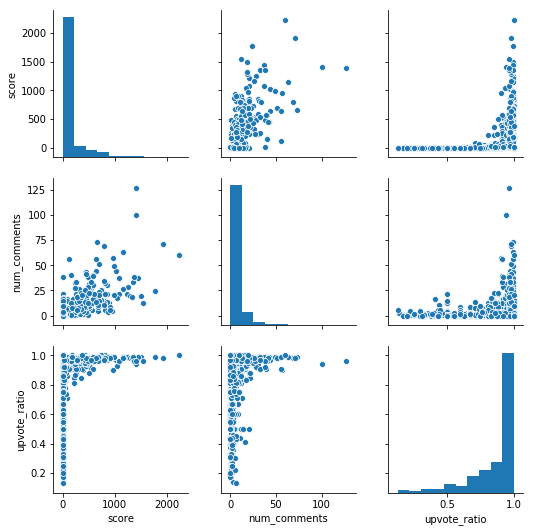

In [178]:
%config InlineBackend.figure_format = 'png'  # to seed the code 
sns.pairplot(data[['score', 'num_comments', 'upvote_ratio']]);

#### There is not direct relation between score and num_comments.
#### It might some other factors that make it more popular in general 

### Is it possible to identify the main features on the basis of which it can be assumed whether the publication will be popular (number of votes) or not?

Let us explore the dist of upvote_ratio

Text(0, 0.5, '% of post')

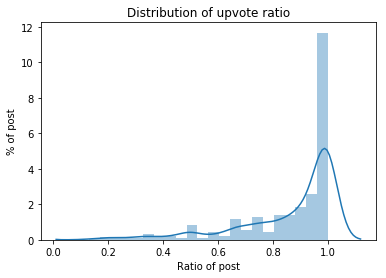

In [185]:
sns.distplot(data.upvote_ratio, vertical=False)
plt.title('Distribution of upvote ratio')
plt.xlabel('Ratio of post')
plt.ylabel('% of post')

#### We see that just about 12 % of the post are become popular
#### So let us find what is most important factors that make post popular among others.
#### We assume that 1 is post popular, and 0 than it is not

In [193]:
# create new binary column 

data['popular_post'] = [1 if i == 1 else 0 for i in data['upvote_ratio']]

In [196]:
df = data.copy() # new copy of the data 

In [200]:
df.to_csv('data_reddit_analysis.csv') # save the data in .csv file 

In [201]:
df.drop(['title', 'id'], axis=1, inplace=True)
# drop features that can not be transformed into numercal or category

In [204]:
# convert the columns into binary format

df['is_video'] = [1 if x == True else 0 for x in df['is_video']]
df['is_original_content'] = [1 if x == True else 0 for x in df['is_original_content']]
df['over_18'] = [1 if x == True else 0 for x in df['over_18']]
df['stickied'] = [1 if x == True else 0 for x in df['stickied']]

In [223]:
df.drop(['created'], axis=1, inplace=True)
df.drop(['author_flair_text', 'distinguished'], axis=1, inplace=True)
df.drop(['author'], axis=1, inplace=True)
df.drop(['upvote_ratio'], axis=1, inplace=True) # drop the ration (we use it as Target Variable)

In [370]:
df.head() # final look of the data, where Tagret values is 'popular_post'

,score,num_comments,is_video,is_original_content,over_18,stickied,week_day,popular_post
0,12,1,1,0,0,0,4,1
1,1,1,0,0,0,0,3,0
2,1,0,0,0,0,0,3,1
3,4,1,1,0,0,0,3,1
4,2,0,0,0,0,0,3,0


In [364]:
# import libs

from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.model_selection import validation_curve

In [366]:
alphas = np.logspace(-2, 0, 20) # range 

sgd_logit = SGDClassifier(loss='log', n_jobs=-1, random_state=17) #SVD classfier

logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2)), 
                       ('sgd_logit', sgd_logit)]) # Pipline

val_train, val_test = validation_curve(logit_pipe, df.drop('popular_post', axis=1), df.popular_post,
                                       'sgd_logit__alpha', alphas, cv=5,
                                        scoring='roc_auc') # get the data for graph


/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to flo

/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and to

/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will b

/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and to

/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to flo

/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will b

/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64 were all converted to float64 by Sta

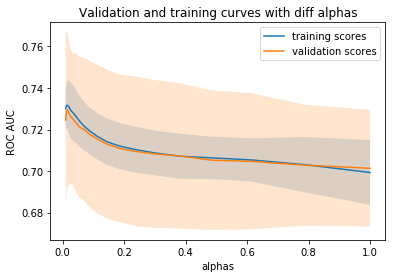

In [376]:
def plot_with_err(x, data, **kwargs): # function to draw plot 
    mu, std = data.mean(1), data.std(1)
    
    lines = plt.plot(x, mu, '-', **kwargs)
    
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

# plots 

plot_with_err(alphas, val_train, label='training scores')
plot_with_err(alphas, val_test, label='validation scores')
plt.title('Validation and training curves with diff alphas')
plt.xlabel('alphas');
plt.ylabel('ROC AUC');
plt.legend();

## Training and validation curves are converged - so we need more data (or more features) to get anything valueable fro business

Later we can use Logistic regression to get fist insites

In [357]:
# # Split data
# X_train, X_test, y_train, y_test = train_test_split(df.drop('popular_post', axis=1), df.popular_post, \
#                                                    random_state=11, test_size=0.2)

In [360]:
# lt = LogisticRegression(random_state=11, solver='lbfgs')

In [361]:
# lt.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=11, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [362]:
# pred = lt.predict_proba(X_test)[:,1] 

In [368]:
# roc_auc_score(y_test, pred)

0.6725802951388888